<a href="https://colab.research.google.com/github/jeniblodev/-QuarentenaDados/blob/master/Exerc%C3%ADcios_Aula_02_Quarentena_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lendo e organizando as Bases de Dados

In [283]:
#base de filmes
import pandas as pd
lista_filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
lista_filmes.columns = ['filmeId', 'titulo', 'generos']
lista_filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [284]:
#base de avaliações
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.columns = ['usuarioId', 'filmeId', 'notaFilme', 'momento']
avaliacoes.head()

,usuarioId,filmeId,notaFilme,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [285]:
#separando apenas as médias das notas por filme
medias_por_filme = avaliacoes.groupby('filmeId')['notaFilme'].mean()
medias_por_filme.head()


filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notaFilme, dtype: float64

In [286]:
#agrupando as médias na lista de filmes
filmes_com_media = lista_filmes.join(medias_por_filme, on='filmeId')
filmes_com_media.columns = ['filmeId', 'titulo', 'generos', 'nota_media']
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [287]:
#agrupando a quantidade de avaliações por filme
total_votos_filme = avaliacoes.groupby('filmeId')['notaFilme'].count()
filmes_com_media_total_votos = filmes_com_media.join(total_votos_filme, on='filmeId')
filmes_com_media_total_votos.columns = ['filmeId', 'titulo', 'generos', 'nota_media', 'votos']
filmes_com_media_total_votos.head()

,filmeId,titulo,generos,nota_media,votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [288]:
#listando os gêneros e quantidades
generos_filmes = lista_filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
generos_filmes

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

#Desafio 1 do Guilherme Silveira
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis. 45

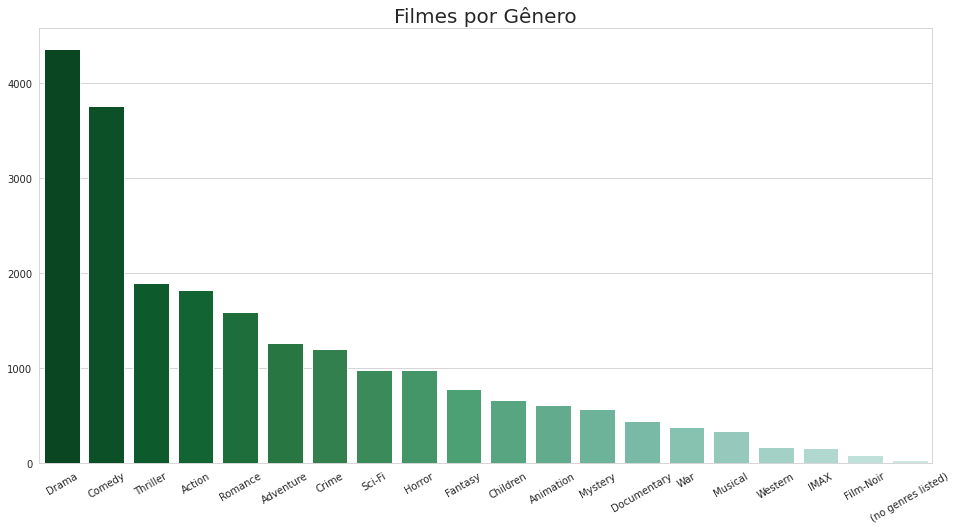

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(16,8))
gr = sns.barplot(x=generos_filmes.index,
                 y=generos_filmes.values,
                 palette=sns.color_palette('BuGn_r', n_colors=len(generos_filmes) +6))
plt.xticks(rotation=30)
plt.title('Filmes por Gênero', fontsize=20)
plt.show()

#Desafio 2 do Paulo Silveira
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [290]:
filmes_com_media.sort_values("nota_media", ascending=False)[4850:4900]

,filmeId,titulo,generos,nota_media
9571,174055,Dunkirk (2017),Action|Drama|Thriller|War,3.423077
2892,3869,"Naked Gun 2 1/2: The Smell of Fear, The (1991)",Comedy,3.423077
1872,2490,Payback (1999),Action|Thriller,3.422222
3229,4361,Tootsie (1982),Comedy|Romance,3.421875
5872,33004,"Hitchhiker's Guide to the Galaxy, The (2005)",Adventure|Comedy|Sci-Fi,3.420455
3624,4975,Vanilla Sky (2001),Mystery|Romance|Sci-Fi|Thriller,3.420455
1319,1777,"Wedding Singer, The (1998)",Comedy|Romance,3.419643
2944,3948,Meet the Parents (2000),Comedy,3.417582
1562,2099,Song of the South (1946),Adventure|Animation|Children|Musical,3.416667
4843,7235,Ichi the Killer (Koroshiya 1) (2001),Action|Comedy|Crime|Drama|Horror|Thriller,3.416667


In [0]:
#criando a função para gerar os resultados
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["notaFilme"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

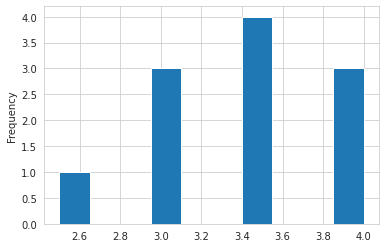

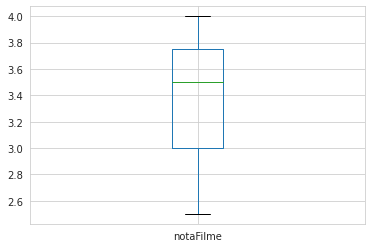

count    11.000000
mean      3.409091
std       0.490825
min       2.500000
25%       3.000000
50%       3.500000
75%       3.750000
max       4.000000
Name: notaFilme, dtype: float64

In [292]:
#Valkyrie (2008)
plot_filme(64983)

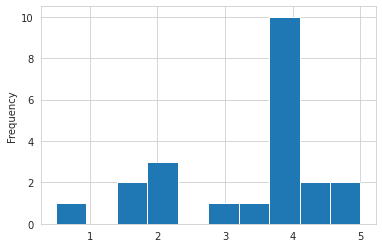

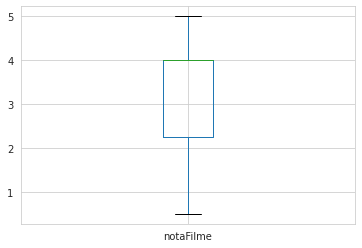

count    22.000000
mean      3.409091
std       1.250108
min       0.500000
25%       2.250000
50%       4.000000
75%       4.000000
max       5.000000
Name: notaFilme, dtype: float64

In [293]:
#Now You See Me (2013)	
plot_filme(102903)

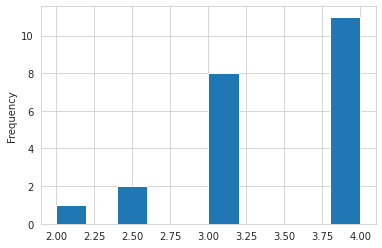

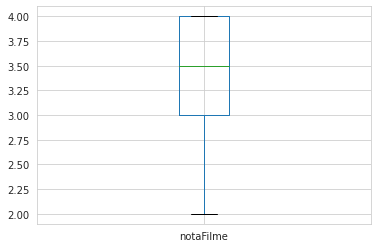

count    22.000000
mean      3.409091
std       0.648007
min       2.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.000000
Name: notaFilme, dtype: float64

In [294]:
#Sleeping Beauty (1959)
plot_filme(2096)

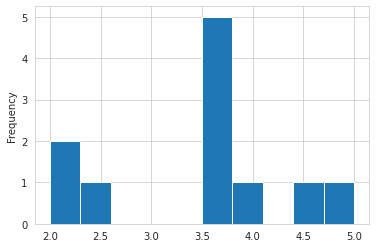

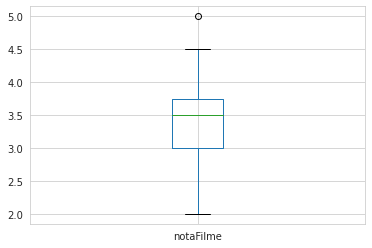

count    11.000000
mean      3.409091
std       0.943880
min       2.000000
25%       3.000000
50%       3.500000
75%       3.750000
max       5.000000
Name: notaFilme, dtype: float64

In [295]:
#Hotel Transylvania (2012)
plot_filme(97225)

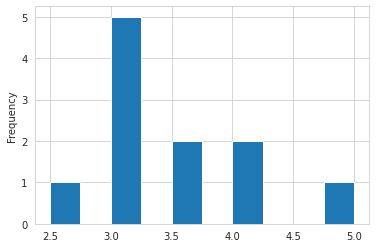

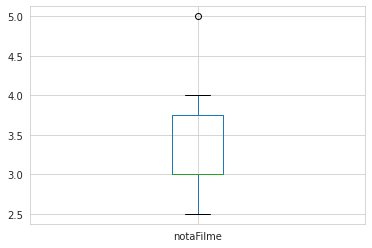

count    11.000000
mean      3.409091
std       0.700649
min       2.500000
25%       3.000000
50%       3.000000
75%       3.750000
max       5.000000
Name: notaFilme, dtype: float64

In [296]:
#Twin Peaks: Fire Walk with Me (1992)	
plot_filme(3262)

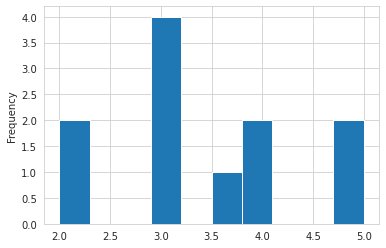

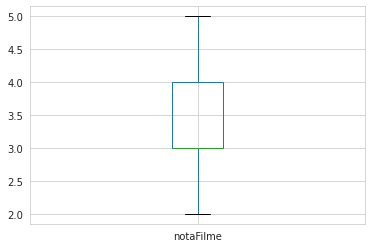

count    11.000000
mean      3.409091
std       1.020250
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: notaFilme, dtype: float64

In [297]:
#Bananas (1971)
plot_filme(1078)

#Desafio 3 do Paulo Silveira
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [298]:
#lista dos 10 filmes mais votados
top_10_votos = filmes_com_media_total_votos.sort_values("votos", ascending=False).head(10)
top_10_votos

,filmeId,titulo,generos,nota_media,votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


In [299]:
#contabilizndo o total de votos por filme
total_votos = avaliacoes.groupby('filmeId')['notaFilme'].count().sort_values(ascending=False)
total_votos.head(10)

filmeId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: notaFilme, dtype: int64

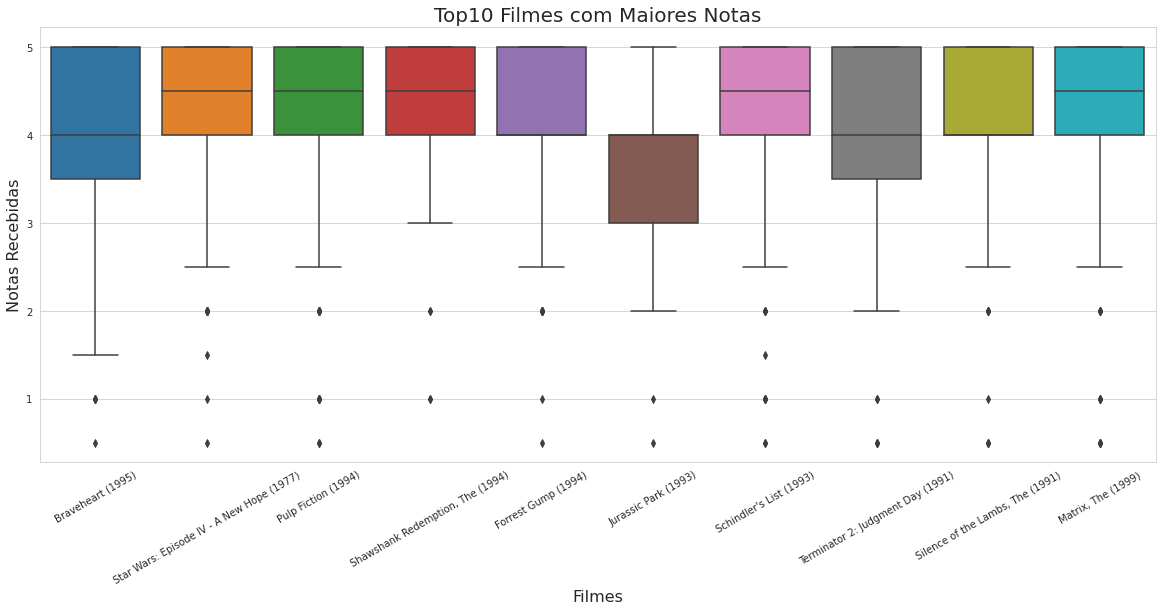

In [300]:
#Gráfico que demonstra as variações de nota dos filmes do Top10
plt.figure(figsize=(20,8))
ax = sns.boxplot(data = avaliacoes.query('filmeId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]'), x ='filmeId', y='notaFilme')

ax.set_xticklabels(lista_filmes.query('filmeId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]')['titulo'], fontsize=10)
ax.set_xlabel('Filmes', fontsize=16)
ax.set_ylabel('Notas Recebidas', fontsize=16)
plt.xticks(rotation=30)
plt.title('Top10 Filmes com Maiores Notas', fontsize=20)
plt.show()


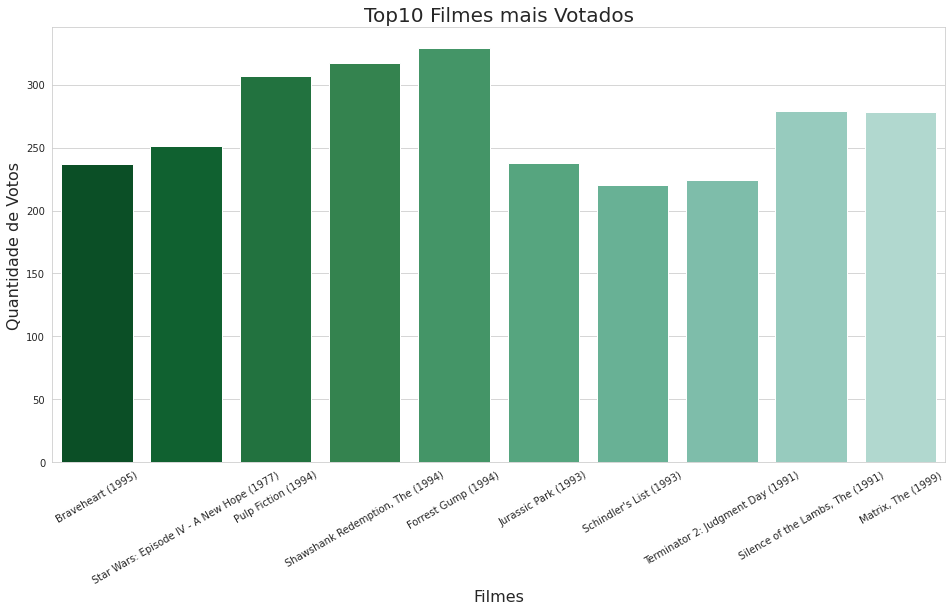

In [301]:
#Gráfico que demonstra quais os filmes mais votados do Top10 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(16,8))
gr = sns.barplot(data = top_10_votos.query('filmeId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]'), x ='filmeId', y='votos', 
                 palette=sns.color_palette("BuGn_r", n_colors=len(top_10_votos) + 4))

gr.set_xticklabels(lista_filmes.query('filmeId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]')['titulo'], fontsize=10)
gr.set_xlabel('Filmes', fontsize=16)
gr.set_ylabel('Quantidade de Votos', fontsize=16)
plt.xticks(rotation=30)
plt.title('Top10 Filmes mais Votados', fontsize=20)
plt.show()

#Desafio 4 do Guilherme Silveira
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

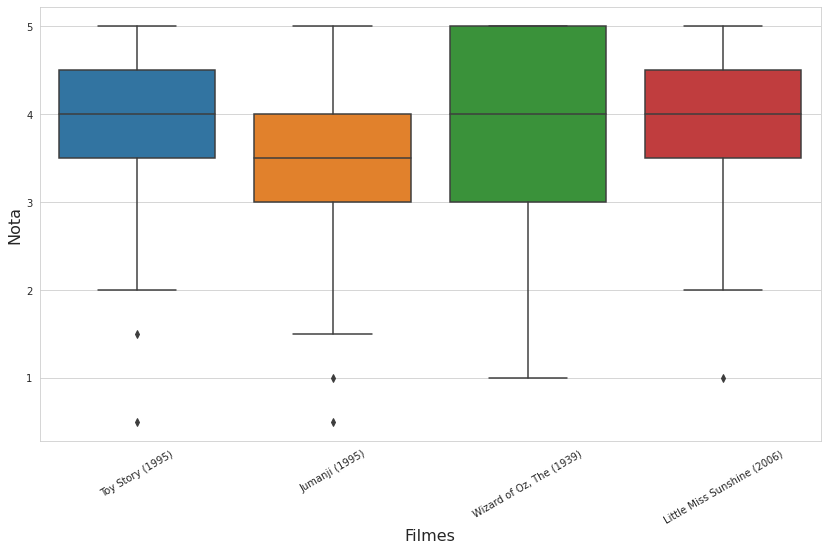

In [302]:
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="notaFilme")

plt.gcf().set_size_inches(14, 8)
ax.set_xticklabels(lista_filmes.query('filmeId in [1,2,919,46578]')['titulo'], fontsize=10)
ax.set_xlabel('Filmes', fontsize=16)
ax.set_ylabel('Nota', fontsize=16)
plt.xticks(rotation=30)
plt.show()

#Desafio 5 do Allan Spadini
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def compara_filme(n):
    filme = lista_filmes.query(f'filmeId=={n}')['titulo']
    nota = avaliacoes.query(f'filmeId=={n}')['notaFilme']

    print(f'Filme: {filme}')
    print()
    print(f'Moda: {nota.mode().values}')
    print(f'Média: {nota.mean()}')
    print(f'Mediana: {nota.median()}')
    print('-------------------------')

In [304]:
#Filmes com nota 0.5
compara_filme(26696)
compara_filme(3604)
compara_filme(7312)
compara_filme(145724)

Filme: 5554    Lionheart (1990)
Name: titulo, dtype: object

Moda: [0.5]
Média: 0.5
Mediana: 0.5
-------------------------
Filme: 2689    Gypsy (1962)
Name: titulo, dtype: object

Moda: [0.5]
Média: 0.5
Mediana: 0.5
-------------------------
Filme: 4881    Follow Me, Boys! (1966)
Name: titulo, dtype: object

Moda: [0.5]
Média: 0.5
Mediana: 0.5
-------------------------
Filme: 9117    Idaho Transfer (1973)
Name: titulo, dtype: object

Moda: [0.5]
Média: 0.5
Mediana: 0.5
-------------------------


In [305]:
#Filmes com nota 3
compara_filme(2611)
compara_filme(4470)
compara_filme(60894)
compara_filme(4473)

Filme: 1966    Winslow Boy, The (1999)
Name: titulo, dtype: object

Moda: [3.]
Média: 3.0
Mediana: 3.0
-------------------------
Filme: 3303    Ariel (1988)
Name: titulo, dtype: object

Moda: [2. 4.]
Média: 3.0
Mediana: 3.0
-------------------------
Filme: 6809    Edge of Love, The (2008)
Name: titulo, dtype: object

Moda: [3.]
Média: 3.0
Mediana: 3.0
-------------------------
Filme: 3305    Bat*21 (1988)
Name: titulo, dtype: object

Moda: [3.]
Média: 3.0
Mediana: 3.0
-------------------------


In [306]:
#Filmes com nota 5
compara_filme(88448)
compara_filme(100556)
compara_filme(143031)
compara_filme(143511)

Filme: 7656    Paper Birds (Pájaros de papel) (2010)
Name: titulo, dtype: object

Moda: [5.]
Média: 5.0
Mediana: 5.0
-------------------------
Filme: 8107    Act of Killing, The (2012)
Name: titulo, dtype: object

Moda: [5.]
Média: 5.0
Mediana: 5.0
-------------------------
Filme: 9083    Jump In! (2007)
Name: titulo, dtype: object

Moda: [5.]
Média: 5.0
Mediana: 5.0
-------------------------
Filme: 9094    Human (2015)
Name: titulo, dtype: object

Moda: [5.]
Média: 5.0
Mediana: 5.0
-------------------------


#Desafio 6 da Thais André
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

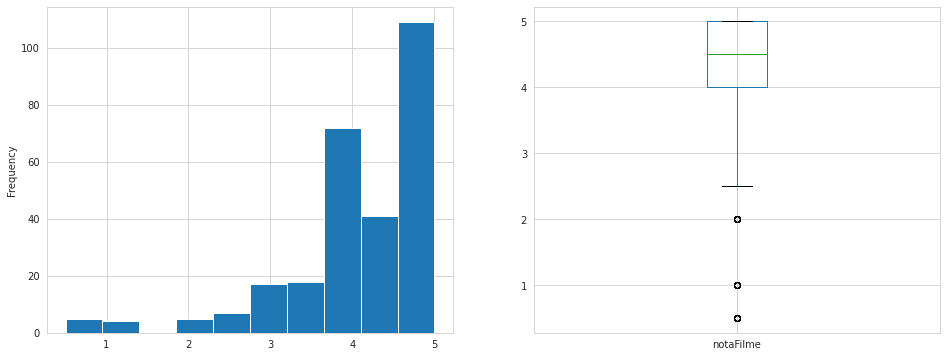

In [307]:
grafico_matrix = avaliacoes.query('filmeId==2571')['notaFilme']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

grafico_matrix.plot(kind='hist', ax=axes[0])
grafico_matrix.plot(kind='box', ax=axes[1])

grafico_matrix.plot.box()
plt.show()



#Desafio 7 do Thiago Gonçalves
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [308]:
filmes_com_media['data_filme'] = lista_filmes['titulo'].str.extract('.*\((.*)\).*', expand = False)
filmes_com_media

,filmeId,titulo,generos,nota_media,data_filme
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,2017
9739,193585,Flint (2017),Drama,3.500000,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,2018


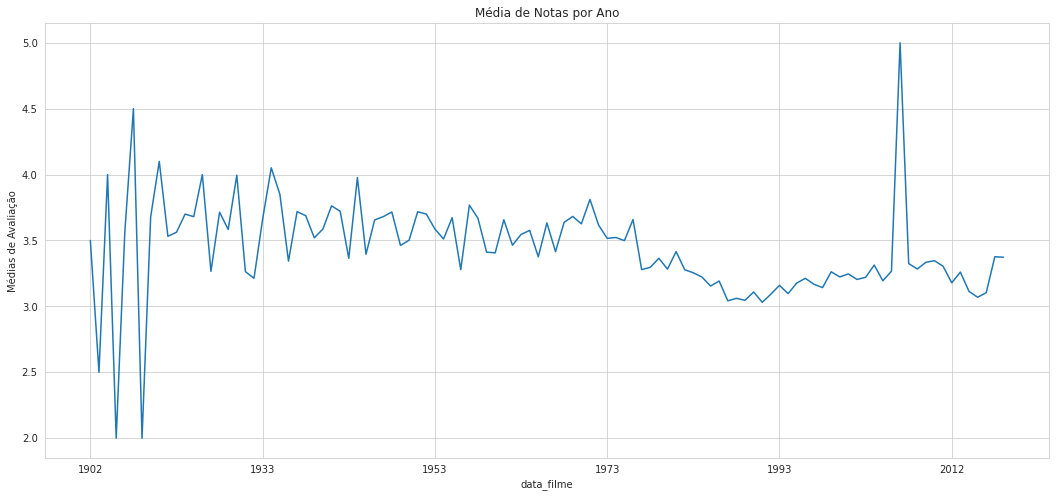

In [309]:
media_por_ano = filmes_com_media.groupby('data_filme')['nota_media'].mean()

plt.figure(figsize=(18, 8))
plt.xlabel('Anos')
plt.ylabel('Médias de Avaliação')
media_por_ano.plot(title='Média de Notas por Ano')

plt.show()